# readme 
descrip: download uo (), vo () from ESGF CMIP6 HRMIP EC-Earth HR and LR <br>

history: <br>
v1.0 DL 2021Aug13 <br>

references: <br>
https://esgf-pyclient.readthedocs.io/en/latest/api.html <br>
sub-sections: <br>
uo: HR: hist-1950/hires-future <br>
    LR: hist-1950/hires-future <br>
same for vo <br>

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pyesgf.search import SearchConnection
conn = SearchConnection('https://esgf-node.llnl.gov/esg-search', distrib=True)

In [3]:
# reference: https://esgf-node.llnl.gov/search/cmip6/
proj = 'CMIP6' # project name
s_id = 'EC-Earth3P-HR' # source id
e_id = 'hist-1950' # experiment id
v_str= 'uo' # variable name string 
v_lab= 'r1i1p2f1' # variant label
# example file name: uo_Omon_EC-Earth3P-HR_hist-1950_r1i1p2f1_gn_195001-195012.nc 

In [4]:
ctx = conn.new_context(
    project = proj,
    source_id = s_id,
    experiment_id = e_id,
    variable = v_str,
    variant_label = v_lab)
ctx.hit_count

2

In [5]:
result = ctx.search()[0]
result.dataset_id

'CMIP6.HighResMIP.EC-Earth-Consortium.EC-Earth3P-HR.hist-1950.r1i1p2f1.Omon.uo.gn.v20181212|esgf-data1.llnl.gov'

In [6]:
files = result.file_context().search()
for file in files:
    print(file.opendap_url) # one file has one year dat

http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r1i1p2f1/Omon/uo/gn/v20181212/uo_Omon_EC-Earth3P-HR_hist-1950_r1i1p2f1_gn_195001-195012.nc
http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r1i1p2f1/Omon/uo/gn/v20181212/uo_Omon_EC-Earth3P-HR_hist-1950_r1i1p2f1_gn_195101-195112.nc
http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r1i1p2f1/Omon/uo/gn/v20181212/uo_Omon_EC-Earth3P-HR_hist-1950_r1i1p2f1_gn_195201-195212.nc
http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r1i1p2f1/Omon/uo/gn/v20181212/uo_Omon_EC-Earth3P-HR_hist-1950_r1i1p2f1_gn_195301-195312.nc
http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r1i1p2f1/Omon/uo/gn/v20181212/uo_Omon_EC-Earth3P-HR_hist-1950_r1i1p2f1_

In [18]:
yr1 = 1979

yr1_ref = 1950 # reference year 1950
yr2_ref = 2014+1
tindx = np.arange(yr1-yr1_ref, yr2_ref-yr1_ref)
tindx
files[tindx[0]].opendap_url
files[tindx[-1]].opendap_url

'http://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r1i1p2f1/Omon/uo/gn/v20181212/uo_Omon_EC-Earth3P-HR_hist-1950_r1i1p2f1_gn_201401-201412.nc'

# Subset single dataset with xarray

In [19]:
ds = xr.open_dataset(files[tindx[0]].opendap_url)
ds

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 1442, j: 1050, lev: 75, time: 12, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 1979-01-16T12:00:00 ... 1979-12...
  * lev                 (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * j                   (j) int32 1 2 3 4 5 6 ... 1045 1046 1047 1048 1049 1050
  * i                   (i) int32 1 2 3 4 5 6 ... 1437 1438 1439 1440 1441 1442
    latitude            (j, i) float32 ...
    longitude           (j, i) float32 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] ...
    lev_bnds            (lev, bnds) float64 ...
    vertices_latitude   (j, i, vertices) float32 ...
    vertices_longitude  (j, i, vertices) float32 ...
    uo                  (time, lev, j, i) float32 ...
Attributes: (12/46)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     HighResMIP
    branch_method:                   none provided
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    comment:                         PRIMAVERA stream 2 historical: experimen...
    ...                              ...
    physics_index:                   2
    variant_label:                   r1i1p2f1
    further_info_url:                https://furtherinfo.es-doc.org/CMIP6.EC-...
    contact:                         cmip6-data@ec-earth.org
    history:                         2020-01-13T12:01:58Z BranchTimeDelete, H...
    DODS_EXTRA.Unlimited_Dimension:  time

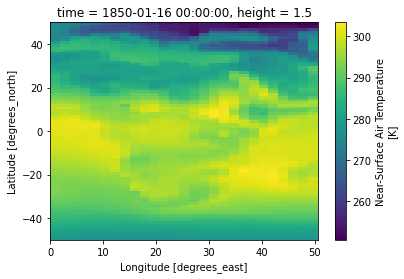

In [7]:
da = ds['tas']
da = da.isel(time=slice(0, 1))
da = da.sel(lat=slice(-50, 50), lon=slice(0, 50))
da.plot()

# Subset over multiple datasets

In [8]:
ds_agg = xr.open_mfdataset([files[0].opendap_url, files[1].opendap_url], chunks={'time': 120}, combine='nested', concat_dim='time')
ds_agg

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, time: 1980)
Coordinates:
  * time       (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 1.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(1200, 144, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(1200, 192, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(120, 144, 192), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           144000.0
    creation_date:                   2019-04-05T16:02:56Z
    ...                              ...
    variable_id:                     tas
    variant_label:                   r1i1p1f2
    license:                         CMIP6 model data produced by the Met Off...
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/255d149c-12fc-41f1-878d-034...
    DODS_EXTRA.Unlimited_Dimension:  time

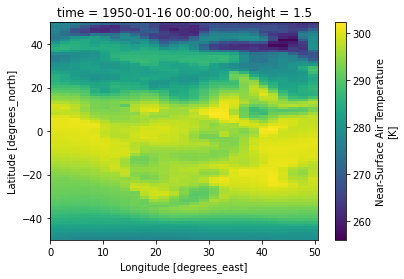

In [9]:
da = ds_agg['tas']
da = da.isel(time=slice(1200, 1201))
da = da.sel(lat=slice(-50, 50), lon=slice(0, 50))
da.plot()

# Download dataset

In [10]:
da.to_netcdf('tas_africa_19500116.nc')